In [1]:
!pip install -qqq mecab-python3
!pip install -qqq unidic-lite
!apt-get -y install fonts-ipafont-gothic
import MeCab
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

     |████████████████████████████████| 574 kB 5.5 MB/s 


In [2]:
with open('/content/drive/MyDrive/個人用/tech-blog/outbox.json') as f:
    df = json.load(f)

In [111]:
l = []
for items in df["orderedItems"]:
    if type(items["object"]) == str:
        continue
    
    if "content" in items["object"].keys():
        items = re.sub(r"<[^>]*?>", "", items["object"]["content"]) #タグ消し
        items = re.sub(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#]+)|", "", items) #URL消し
        items = re.sub(r"@.* ", "", items) #@消し
        l.append(items)
        print(items)

#初めてのトゥート
初めて見た先輩方だったけど、皆さん全員すごい人たちだった…（語彙力）#卒業式
新学期隔週で通えるようになるけど、そうなると定期券買っても半分無駄になっちゃうんだよな…東京行きまくるしか
今udemyで統計学の基礎の講座を無料公開されている方がいます！これから統計学を学ぶ人、学んだけど復習したい人は是非見てみてください！ちなみに本来の価格は12000円らしい…リンク（）
python課題のサイコロのやつ頭こんがらがりすぎたので実際のサイコロ使って考え中
課題の問題文、Yes、Noの意味を勘違いして逆にしてたせいで３時間くらいずっと悩んでた…一人でやっているとこういうことがあるから怖い
@eriすいません！私も参加させてもらってもいいでしょうか…？
ありがとうございます！２２日でお願いします～！
人生初Discoだ
全然大丈夫ですよ～！お疲れさまでした！
21:30すぎに入ろうと思います！#新入生のつどい
Pycharm有料版は学生だと無料で使えるのか！！いまいち無料版との違いがわからんけど
了解です👍
Jupyter Notebookのテーマ変えたらモチベ上がった
久しぶりに飯田橋きた
電波が悪くて何も聞こえない…
こりゃWifi見直さないと一生H.I.Space入れないやつや
Wifi遅いとめっちゃ重くなっちゃいますよねｗ
eriさんのおかげでディスコの音が聞こえるようになりました！歓喜
今日仲良くなった人がみんな奇数という悲劇偶数民少なすぎる…
本当ですか！！よかったら授業とか一緒に行きたいです🙏
ありがとうございます😭よかったらLine追加お願いします！
Now
是非！今日のもくもく会参加できるのでそこでやりましょう！
pandasの軸の概念が毎回ごっちゃになってたけどこれのおかげで少し理解できるようになった
風呂から出たら入ります！#新入生のつどい
ライブラリ一つ一つをじっくり学んでるとpythonそのものの構文の書き方を忘れてしまう…
すいません抜けてたと思ってたら抜けれてませんでした！🙇‍♂️自由にやっちゃってください！
レタス開けん…
Jupyter notebookは本来はジュパイターノートブックって読むのか…初めて知った…
結婚式みたいｗ
最終課題何を解析しようかな
とりあえず５、６個考える
仮想通貨マイニングしてみたい
風呂から

In [112]:
text = "".join(l)

In [116]:
tagger = MeCab.Tagger()
tagger.parse('')
node = tagger.parseToNode(text)
# 名詞のみ取り出す
word_list = []
while node:
    word_type = node.feature.split(',')[0]
    if word_type in ["名詞"]:
        word_list.append(node.surface)
    node = node.next
# word_listを文字列に変換する
word_chain = ' '.join(word_list)

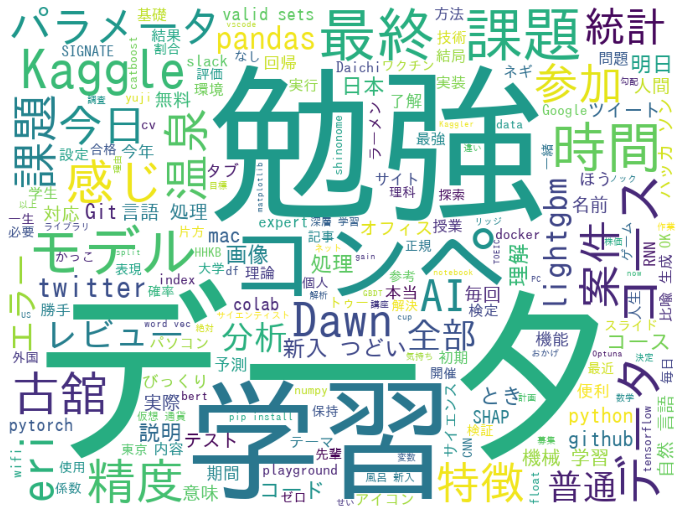

In [123]:
# ワードクラウド表示
words = ["やつ", "自分", "私","わたし","僕","あなた","みんな","ただ","ほか","それ", "もの", "これ", "ところ","ため","うち","ここ","そう","どこ", "つもり", "いつ","あと","もん","はず","こと","そこ","あれ","なに","傍点","まま","事","人","方","何","時","一","二","三","四","五","六","七","八","九","十"]
font_path_gothic = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
result = WordCloud(width=800, height=600, background_color='white', stopwords=words, font_path="/usr/share/fonts/truetype/fonts-japanese-gothic.ttf").generate(word_chain)
plt.figure(figsize=(12,10))
plt.imshow(result)
plt.axis('off')
plt.show()